In [1]:
import json
import pandas as pd
import numpy as np
import re

In [2]:
file_dir = r"C:\Users\candy\OneDrive\Documents\Bootcamp\Module 8- ETL\Challenge\Movies-ETL\Resources"

## Import wiki data

In [3]:
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [4]:
# see if the number of movies released makes sense (remember: we are looking at indie movies between 1990 - 2018)
len(wiki_movies_raw)

7311

In [5]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [6]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [7]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

## import Kaggle data

In [8]:
# read movie metadata csv
movies_metadata = pd.read_csv(f"{file_dir}\movies_metadata.csv", low_memory = False)

# read ratings csv
ratings = pd.read_csv(f"{file_dir}/ratings.csv", low_memory = False)

In [9]:
# get a sample of the data to see if the datasets were loaded correctly
ratings.sample(n=5)

,userId,movieId,rating,timestamp
21468392,223008,43,5.0,868472791
3915084,40698,59315,3.0,1494972569
1659033,17215,40629,4.0,1482901663
17170070,178278,2915,1.5,1161414576
21924588,227753,80330,3.5,1463268492


# Clean the wiki data

In [10]:
wiki_data_df = pd.DataFrame(wiki_movies_raw)
wiki_data_df.head(10)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,https://en.wikipedia.org/wiki/The_Ambulance,1990.0,https://www.imdb.com/title/tt0099026/,The Ambulance,Larry Cohen,"[Larry Cohen, Moctesuma Esparza, Robert Katz]",NaN,NaN,NaN,"[Eric Roberts, James Earl Jones, Red Buttons, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,https://en.wikipedia.org/wiki/American_Dream_(...,1990.0,https://www.imdb.com/title/tt0099028/,American Dream,"[Barbara Kopple, Co-directors:, Cathy Caplan, ...","[Arthur Cohn, Barbara Kopple]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,https://en.wikipedia.org/wiki/American_Ninja_4...,1990.0,https://www.imdb.com/title/tt0101326/,American Ninja 4: The Annihilation,Cedric Sundstrom,Ovidio G Assonitis,NaN,NaN,NaN,"[Michael Dudikoff, David Bradley, James Booth,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,https://en.wikipedia.org/wiki/Andre%27s_Mother,1990.0,https://www.imdb.com/title/tt0099037/,Andre's Mother,Deborah Reinisch,"[Sarah Green, Deborah Reinisch]",NaN,NaN,NaN,"[Richard Thomas, Sada Thompson, Sylvia Sidney]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,https://en.wikipedia.org/wiki/Angel_Town_(film),1990.0,https://www.imdb.com/title/tt0099039/,Angel Town,Eric Karson,"[Ash R. Shah, Eric Karson]",NaN,NaN,NaN,"[Olivier Gruner, Theresa Saldana, Frank Aragon...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# there seems to be a LOT of columns in the wiki data...let's check it out
wiki_data_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [12]:
# get from the raw wiki data the dictionaries that for sure contain movies, not shows or anything else

wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie 
                   and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [13]:
# create a dataframe of for this revised # of movies
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# let's check out what is going on with all of the language related columns in our movies data....

# go through each column in the movie_df to see which contain alternative, foreign titles to movies

# columns_with_alt_titles: 
list_alt_titles = ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']

In [15]:
# create a function to clean the data
def clean_movie(movie):
    #create a non-destructive copy
    movie = dict(movie) 
    
    # make an empty dictionary to hold alternative movie titles
    alt_titles = {}
    
    # Check if the current key exists in the movie object.
    for key in list_alt_titles:
            
            # If so, remove the ke-value pair and add to the alternative titles dictionary.
            if key in movie:
                alt_titles[key] = movie[key]
                movie.pop(key)
          
    # after looping through every key, add the alternative titles dict to the movie object.
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
        
     # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
            
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
        
    return movie

In [16]:
# make a list of cleaned movie titles
clean_movies = [clean_movie(movie) for movie in wiki_movies]

# update wiki_movies_df
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [17]:
# get the IMDB id from the imdb_link, we will later use this ID to join with the kaggle csv data
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))

7076


In [18]:
# drop IMDB id duplicates
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))

7033


In [19]:
# check for which columns have over 90% null values
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns 
 if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

# make a list of columns to keep
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < 
                        len(wiki_movies_df) * 0.9]
print(wiki_columns_to_keep)

['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring', 'Cinematography', 'Release date', 'Running time', 'Country', 'Language', 'Budget', 'Box office', 'Director', 'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)', 'Production company(s)', 'Writer(s)', 'imdb_id']


In [20]:
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018


In [21]:
# look at the wiki_movies_df schema
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

## Clean Box Office data

In [22]:
# drop nas from box office column
box_office = wiki_movies_df['Box office'].dropna()

# see which rows in box office do not have string as their type
box_office[box_office.map(lambda x: type(x) != str)]

# change all rows to string type by joining list row types
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [23]:
# regular expressions with the box office data
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [24]:
# count the number of rows that are returned with the form_one format
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3903

In [25]:
# count the number of rows that are returned with the form_two format
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1559

In [26]:
# see which values do not match either regular expression we created
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

box_office_non_matches = box_office[~matches_form_one & ~matches_form_two]
print(len(box_office_non_matches))

25


In [27]:
# look at values with ranges for the dollar amount
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)
box_office[110]

'$4.37 million'

In [28]:
# extract the box office data that matches form_one and form_two for a new dataframe
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [29]:
# create a function to turn the extracted values into a numeric value.

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [30]:
# updating the wiki_movies_df to have cleaned box_office values
wiki_movies_df['Box office'] = box_office.str.extract(f'({form_one}|{form_two})', 
                                                      flags=re.IGNORECASE)[0].apply(parse_dollars)

## Clean Budget data

In [31]:
budget = wiki_movies_df['Budget'].dropna()
print(len(budget))

# convert any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

# remove any values between dollar sign and hyphen
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

4738


In [32]:
# see which values do not match either regular expression we created
budget_matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
budget_matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)

budget_non_matches = budget[~budget_matches_form_one & ~budget_matches_form_two]
budget_non_matches

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [33]:
# remove citation references from budgets 
budget = budget.str.replace(r'\[\d+\]\s*', '')
print(budget[5055])

$155 million


In [34]:
budget_matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
budget_matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)

budget_non_matches = budget[~budget_matches_form_one & ~budget_matches_form_two]
print(len(budget_non_matches))

32


In [35]:
# extract the budget data that matches form_one and form_two for a new dataframe
budget.str.extract(f'({form_one}|{form_two})')

,0
0,$20 million
1,$6 million
2,$35 million
3,$12 million
4,$25 million
...,...
7070,NaN
7071,$42 million
7072,$60 million
7073,$20 million


In [36]:
# updating the wiki_movies_df to have cleaned budget values
wiki_movies_df['Budget'] = budget.str.extract(f'({form_one}|{form_two})', 
                                                      flags=re.IGNORECASE)[0].apply(parse_dollars)

## Clean release date data

In [37]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [38]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [39]:
# extract the dates
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


In [40]:
# update the wiki_movies_df release date column
wiki_movies_df['Release_date'] = pd.to_datetime(release_date.str.extract
                                                (f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0]
                                                , infer_datetime_format=True)

## Clean runtime data

In [41]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [42]:
# most of the entries seem to be in the same format, let's check
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6528

In [43]:
# let's see what the other 366 entries look like
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [44]:
# let's reformat our one format to include more values
running_time.str.contains('\d*\s*m', flags=re.IGNORECASE).sum()

6891

In [45]:
# add a second form type : r'(\d+)\s*ho?u?r?s?\s*(\d*)
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [46]:
# convert strings to numeric values
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
running_time_extract

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0
...,...,...,...
7071,0.0,0.0,90.0
7072,0.0,0.0,132.0
7073,0.0,0.0,120.0
7074,0.0,0.0,123.0


In [47]:
wiki_movies_df['Running time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], 
                                                            axis=1)

print(wiki_movies_df['Running time'])

0       102.0
1       114.0
2       113.0
3       106.0
4        95.0
        ...  
7071     90.0
7072    132.0
7073    120.0
7074    123.0
7075     90.0
Name: Running time, Length: 7033, dtype: float64


## Clean the Kaggle data

In [48]:
# look at the movies_metadata value types
movies_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [49]:
# columns that need to be changed are 'adult', 'id', 'popularity', 'release_date', 'video', 'budget'

# adult should be boolean, let's see if there is any bad data
movies_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [50]:
# remove bad data
movies_metadata[~movies_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
movies_metadata = movies_metadata[movies_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [52]:
# now let's look at the video column
movies_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [53]:
# convert video datatypes to boolean
movies_metadata['video'] = movies_metadata['video'] == 'True'

In [54]:
# convert budget id, budget, and popularity columns to numeric
movies_metadata['budget'] = movies_metadata['budget'].astype(int)
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='raise')
movies_metadata['popularity'] = pd.to_numeric(movies_metadata['popularity'], errors='raise')

In [55]:
# convert realease date column to datetime
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'])

In [56]:
# let's now look at the ratings data
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [57]:
# convert timestamp data to datetime
pd.to_datetime(ratings['timestamp'], unit='s')
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

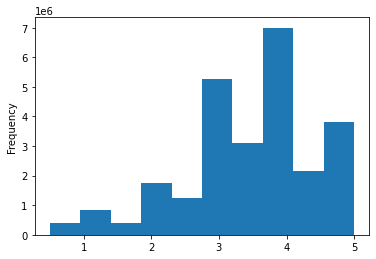

In [58]:
# let's see if there are any outlandish values in the actual ratings column of the ratings data
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

## Merge the data

In [59]:
# merge the wiki and movies_metadata tables
movies_df = pd.merge(wiki_movies_df, movies_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])
movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title_wiki',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id',
 'Release_date',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title_kaggle',
 'video',
 'vote_average',
 'vote_count']

In [60]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             drop the wikipedia table
# Running time             runtime                  keep kaggle, fill in 0s with Wikipedia data if applicable
# Budget                   budget                   keep kaggle, fill in 0s with Wikipedia data if applicable
# Box office               revenue                  keep kaggle, fill in 0s with Wikipedia data if applicable
# Release_date             release_date             Drop wikipedia, drop row 3607 (wikipedia data has a lot of null values)
# Language                 original_language        Drop wikipedia (due to tuples/lists)
# Production company(s)    production_companies     Drop wikipedia (kaggle more consistent)

In [61]:
# compare the competing data
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [62]:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Running time,Country,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


<AxesSubplot:xlabel='Running time', ylabel='runtime'>

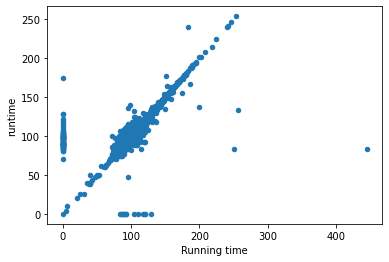

In [63]:
# compare runtime data
movies_df.fillna(0).plot(x='Running time', y='runtime', kind='scatter')

<AxesSubplot:xlabel='Budget', ylabel='budget'>

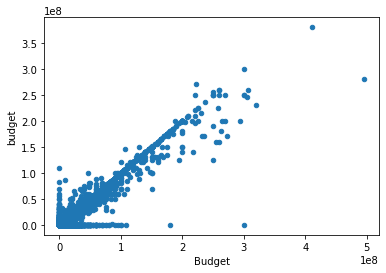

In [64]:
# compare the budget data
movies_df.fillna(0).plot(x='Budget',y='budget', kind='scatter')

<AxesSubplot:xlabel='Box office', ylabel='revenue'>

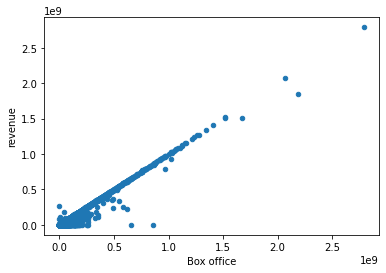

In [65]:
# check the box office data
movies_df.fillna(0).plot(x='Box office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='Box office', ylabel='revenue'>

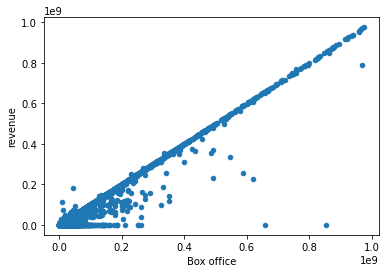

In [66]:
# plot every box office point to filter for those less than $1B to get a better idea of the data
movies_df.fillna(0)[movies_df['Box office'] < 10**9].plot(x='Box office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='Release_date'>

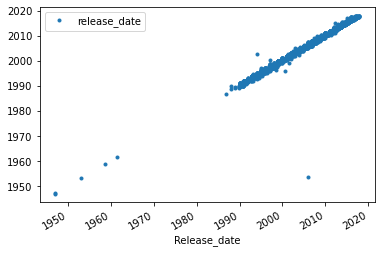

In [67]:
# plot the release date data
movies_df[['Release_date','release_date']].plot(x='Release_date', y='release_date', style='.')

In [68]:
# look at outliers in release date
movies_df[(movies_df['Release_date'] > '1996-01-01') & (movies_df['release_date'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Running time,Country,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3607,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",Dean Cundey,"[December 8, 2006, (, 2006-12-08, )]",136.0,United States,...,1953-08-28,30500000.0,118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.2,137.0


In [69]:
# drop outlier row above because when we merged the dataframe, The Holiday and From Here to Eternity seemed to get merged...
movies_df[(movies_df['Release_date'] > '1996-01-01') & (movies_df['release_date'] < '1965-01-01')].index

Int64Index([3607], dtype='int64')

In [70]:
# see where there are null values in the wiki data
movies_df[movies_df['Release_date'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Running time,Country,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
1008,https://en.wikipedia.org/wiki/Black_Scorpion_(...,1995,https://www.imdb.com/title/tt0112519/,Black Scorpion,NaN,"[Joan Severance, Bruce Abbott, Garrett Morris]",Geoff George,NaN,90.0,United States,...,1995-08-22,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice has a nasty sting.,Black Scorpion,False,6.1,7.0
1061,https://en.wikipedia.org/wiki/Flirt_(1995_film),1995,https://www.imdb.com/title/tt0113080/,Flirt,NaN,"[Bill Sage, Dwight Ewell, Miho Nikaido]",Michael Spiller,NaN,83.0,"[United States, Germany, Japan, [1]]",...,1995-09-14,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Flirt,False,7.5,4.0
1121,https://en.wikipedia.org/wiki/Let_It_Be_Me_(19...,1995,https://www.imdb.com/title/tt0113638/,Let It Be Me,NaN,NaN,Miroslav Ondrícek,NaN,NaN,NaN,...,1995-11-17,0.0,95.0,[],Released,NaN,Let It Be Me,False,8.0,2.0
1564,https://en.wikipedia.org/wiki/A_Brooklyn_State...,1997,https://www.imdb.com/title/tt0118782/,A Brooklyn State of Mind,NaN,NaN,Ken Kelsch,NaN,NaN,NaN,...,1998-01-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Brooklyn State of Mind,False,5.0,1.0
1633,https://en.wikipedia.org/wiki/Highball_(film),1997,https://www.imdb.com/title/tt0119291/,Highball,NaN,"[Justine Bateman, Peter Bogdanovich, Chris Eig...",Steven Bernstein,NaN,110.0,United States,...,1997-01-01,0.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Highball,False,4.5,4.0
1775,https://en.wikipedia.org/wiki/Velocity_Trap,1997,https://www.imdb.com/title/tt0120435/,Velocity Trap,NaN,"[Olivier Gruner, Alicia Coppola, Ken Olandt]",Philip D. Schwartz,NaN,89.0,United States,...,1999-02-22,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Crime at the Speed of Light,Velocity Trap,False,4.7,6.0
2386,https://en.wikipedia.org/wiki/The_Visit_(2000_...,2000,https://www.imdb.com/title/tt0199129/,The Visit,NaN,"[Hill Harper, Billy Dee Williams, Obba Babatun...",John L. Demps Jr.,NaN,107.0,NaN,...,2000-01-01,0.0,107.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,NaN,The Visit,False,0.0,0.0
2786,https://en.wikipedia.org/wiki/Stevie_(2002_film),2002,https://www.imdb.com/title/tt0334416/,Stevie,NaN,NaN,"[Dana Kupper, Gordon Quinn, Peter Gilbert]",NaN,144.0,United States,...,2002-09-09,97000.0,140.0,[],NaN,NaN,Stevie,False,6.7,13.0
3174,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",NaN,NaN,NaN,"[Denmark, USA, UK]",...,2004-09-17,0.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.9,13.0
3651,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",NaN,NaN,89.0,United States,...,2006-03-11,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.5,8.0


In [71]:
# see where there are null values in the kaggle data
movies_df[movies_df['release_date'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Running time,Country,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [72]:
# look at the language data
# some of the language data from wiki seems to be in a list and thus we get an error when trying to count it

# create tuples for type rather than list
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                                  5480
NaN                                       134
(English, Spanish)                         68
(English, French)                          35
(English, Japanese)                        25
                                         ... 
English, German and Hungarian               1
(English, Mende, Spanish, Portuguese)       1
(Mandarin, English, Korean)                 1
(English, Spanish, [1])                     1
(Japanese, English)                         1
Name: Language, Length: 198, dtype: int64

In [73]:
# check kaggle language data
movies_df['original_language'].value_counts(dropna=False)

en    5988
fr      16
es      10
it       8
de       6
zh       4
pt       4
ja       4
da       2
hi       2
ar       1
cn       1
ru       1
ko       1
ab       1
sv       1
tr       1
he       1
Name: original_language, dtype: int64

In [74]:
movies_df[['Production company(s)','production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6047,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


In [75]:
# drop decided wiki titles
movies_df.drop(columns=['title_wiki','Release_date','Language','Production company(s)'], inplace=True)

In [76]:
# make a function to fill in missing kaggle data with wiki data where decided to do so
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)

In [77]:
# run fill_missing_kaggle_data on decided columns
fill_missing_kaggle_data(movies_df, 'runtime', 'Running time')
fill_missing_kaggle_data(movies_df, 'budget', 'Budget')
fill_missing_kaggle_data(movies_df, 'revenue', 'Box office')
movies_df

,url,year,imdb_link,Based on,Starring,Cinematography,Release date,Country,Director,Distributor,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,Renny Harlin,20th Century Fox,...,1990-07-11,20423389.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.2,72.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,James Foley,Avenue Pictures,...,1990-08-24,2700000.0,114.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.5,17.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",United States,Roger Spottiswoode,TriStar Pictures,...,1990-08-10,33461269.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.3,146.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",United States,Woody Allen,Orion Pictures,...,1990-12-25,7331647.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.3,57.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",US,John Cornell,Paramount Pictures,...,1990-12-21,6939946.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.6,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,NaN,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,"[12 February 2017, (, 2017-02-12, ), (, Berlin...","[Chile, Germany, Spain, United States, [2]]",Sebastián Lelio,"[Participant Media (Chile), Piffl Medien (Germ...",...,2017-04-06,3700000.0,104.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.2,13.0
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,"[April 22, 2017, (, 2017-04-22, ), (, Tribeca ...",United States,Brian Crano,Good Deed Entertainment,...,2017-04-22,NaN,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.0,1.0
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,"[18 May 2017, (, 2017-05-18, ), (, Cannes, ), ...","[Russia, France, Belgium, Germany, [3]]",Andrey Zvyagintsev,"[Sony Pictures Releasing, (Russia), [1]]",...,2017-06-01,4800000.0,128.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.8,26.0
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Andrew Reed,"[March 12, 2017, (, 2017-03-12, ), (, SXSW, ),...",United States,Aaron Katz,Neon,...,2017-03-12,200340.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemini,False,0.0,0.0


In [78]:
# ensure that no columns only have one value

for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [80]:
movies_df['video'].value_counts(dropna=False)

False    6052
Name: video, dtype: int64

In [81]:
# because every value for video is false, we can go ahead and drop that column
movies_df.drop(columns=['video'], inplace=True)

In [86]:
# reoder the columns in the DataFrame
column_order = ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget','revenue','release_date','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on'
                      ]

movies_df = movies_df[column_order]

In [88]:
# rename columns
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget':'budget',
                  'release_date':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

C:\Users\candy\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [93]:
# now for the ratings data....
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1) \
                .pivot(index='movieId',columns='rating', values='count')
rating_counts

rating,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
movieId,,,,,,,,,,
1,441.0,804.0,438.0,2083.0,1584.0,11577.0,5741.0,22020.0,5325.0,15995.0
2,263.0,797.0,525.0,2479.0,1810.0,8510.0,2916.0,6035.0,690.0,2035.0
3,169.0,772.0,233.0,1665.0,616.0,6213.0,759.0,3433.0,154.0,1483.0
4,47.0,351.0,31.0,496.0,77.0,1133.0,66.0,557.0,12.0,211.0
5,237.0,785.0,270.0,1716.0,664.0,6608.0,723.0,2959.0,166.0,1130.0
...,...,...,...,...,...,...,...,...,...,...
176267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
176269,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
176271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [98]:
# merge the ratings and movie_df
movies_with_ratings_df = pd.merge(movies_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')

In [99]:
# fill NAs
movies_with_ratings_df[rating_counts.columns] = movies_with_ratings_df[rating_counts.columns].fillna(0)

In [100]:
movies_with_ratings_df

,imdb_id,kaggle_id,title,original_title,tagline,belongs_to_collection,wikipedia_url,imdb_link,runtime,budget,...,rating_rating_0.5,rating_rating_1.0,rating_rating_1.5,rating_rating_2.0,rating_rating_2.5,rating_rating_3.0,rating_rating_3.5,rating_rating_4.0,rating_rating_4.5,rating_rating_5.0
0,tt0098987,9548,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane,Kojak. Columbo. Dirty Harry. Wimps.,NaN,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.imdb.com/title/tt0098987/,104.0,49000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tt0098994,25501,"After Dark, My Sweet","After Dark, My Sweet",All they risked was everything.,NaN,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",https://www.imdb.com/title/tt0098994/,114.0,6000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt0099005,11856,Air America,Air America,The few. The proud. The totally insane.,NaN,https://en.wikipedia.org/wiki/Air_America_(film),https://www.imdb.com/title/tt0099005/,112.0,35000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt0099012,8217,Alice,Alice,NaN,NaN,https://en.wikipedia.org/wiki/Alice_(1990_film),https://www.imdb.com/title/tt0099012/,102.0,12000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt0099018,25943,Almost an Angel,Almost an Angel,Who does he think he is?,NaN,https://en.wikipedia.org/wiki/Almost_an_Angel,https://www.imdb.com/title/tt0099018/,95.0,25000000.0,...,3.0,0.0,3.0,2.0,5.0,26.0,37.0,46.0,16.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,tt5639354,429191,A Fantastic Woman,Una mujer fantástica,NaN,NaN,https://en.wikipedia.org/wiki/A_Fantastic_Woman,https://www.imdb.com/title/tt5639354/,104.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6048,tt5390066,390059,Permission,Permission,NaN,NaN,https://en.wikipedia.org/wiki/Permission_(film),https://www.imdb.com/title/tt5390066/,96.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6049,tt6304162,429174,Loveless,Нелюбовь,NaN,NaN,https://en.wikipedia.org/wiki/Loveless_(film),https://www.imdb.com/title/tt6304162/,128.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6050,tt5795086,412302,Gemini,Gemini,NaN,NaN,https://en.wikipedia.org/wiki/Gemini_(2017_film),https://www.imdb.com/title/tt5795086/,92.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
